Best fit parameters:
a = (3.39+/-0.12)e+06
b = 80+/-12


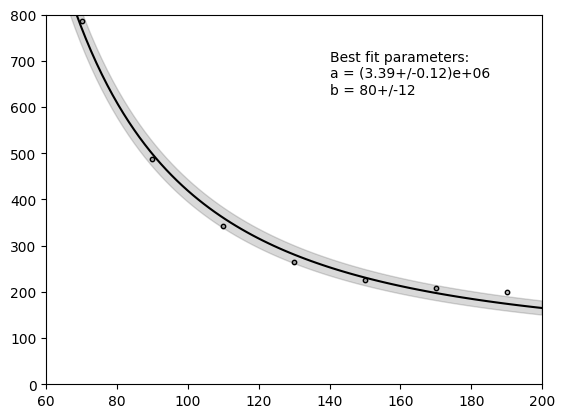

In [1]:
from scipy.optimize import curve_fit
import matplotlib.pylab as plt
import numpy as np

func = lambda x, a, b: a * (1 / (x**2)) + b

n_ypoints = 7
x_data = np.linspace(70, 190, n_ypoints)

y_data = np.array([786.31, 487.27, 341.78, 265.49,
                    224.76, 208.04, 200.22])

best_fit_ab, covar = curve_fit(func, x_data, y_data)
sigma_ab = np.sqrt(np.diagonal(covar))

# an easy way to properly format parameter errors
from uncertainties import ufloat
a = ufloat(best_fit_ab[0], sigma_ab[0])
b = ufloat(best_fit_ab[1], sigma_ab[1])
text_res = "Best fit parameters:\na = {}\nb = {}".format(a, b)
print(text_res)

plt.scatter(x_data, y_data, facecolor = 'silver',
            edgecolor = 'k', s = 10, alpha = 1)

# plotting the model
hires_x = np.linspace(50, 200, 100)
plt.plot(hires_x, func(hires_x, *best_fit_ab), 'black')
bound_upper = func(hires_x, *(best_fit_ab + sigma_ab))
bound_lower = func(hires_x, *(best_fit_ab - sigma_ab))
# plotting the confidence intervals
plt.fill_between(hires_x, bound_lower, bound_upper,
                 color = 'black', alpha = 0.15)
plt.text(140, 630, text_res)
plt.xlim(60, 200)
plt.ylim(0, 800)
plt.show()